<a href="https://colab.research.google.com/github/ElielLucas/optimization_bootcamp_challenge/blob/main/Bootcamp_portos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contextualização

Um porto marítimo trabalha com dois tipos de produtos (chamados produto **A** e produto **B**), recebendo os produtos de *caminhões*, e carregando os produtos em *navios* para serem enviados pelo oceano.

Cada um dos produtos possui seu próprio depósito (depósito **A** e depósito **B**), que servem de intermediário entre os caminhões e os navios. Os depósitos têm capacidade limitada.

Cada caminhão carrega apenas um dos dois produtos, e caminhões carregam quantidades diferentes entre si. Além disso, as transportadoras informam, para cada caminhão, seu *tempo exato de chegada* (que é seguido pontualmente). Apenas um caminhão pode ser descarregado de cada vez, e se um caminhão chega enquanto outro já está sendo descarregado, ele deve ir para a *fila de caminhões*.

Os navios a serem carregados são designados a *um produto específico* entre **A** e **B**, e seu tempo de chegada depende exclusivamente da sua ordenação em uma *fila de navios*, com o primeiro navio chegando logo no início do cenário (hora 0), e os próximos navios chegando no exato momento em que os navios anteriores terminam de ser carregados. Navios têm capacidades diferentes um do outro, e só podem carregar o produto ao qual eles são designados. Apenas um navio pode ser carregado de cada vez.

O porto conta com duas esteiras rolantes que conectam a estação de descarregamento de caminhões com os armazéns (uma vai do caminhão para o depósito **A**, e outra do caminhão para o depósito **B**), e duas tubulações que conectam os armazéns com a doca de carregamento de navios (uma do depósito **A** para o navio, e outra do depósito **B** para o navio). Coletivamente, nos referimos às esteiras rolantes e tubulações como *meios de distribuição*.

Cada meio de distribuição pode entrar em manutenção, durante certos períodos, com horário e duração pré-agendados. A agenda é feita de tal forma que *nunca haverão dois meios de distribuição em manutenção ao mesmo tempo*.

Nosso objetivo, neste cenário, é definir a ordem da *fila de navios* de forma a **minimizar o tempo de carregamento de todos os navios**.

# Descrição do problema


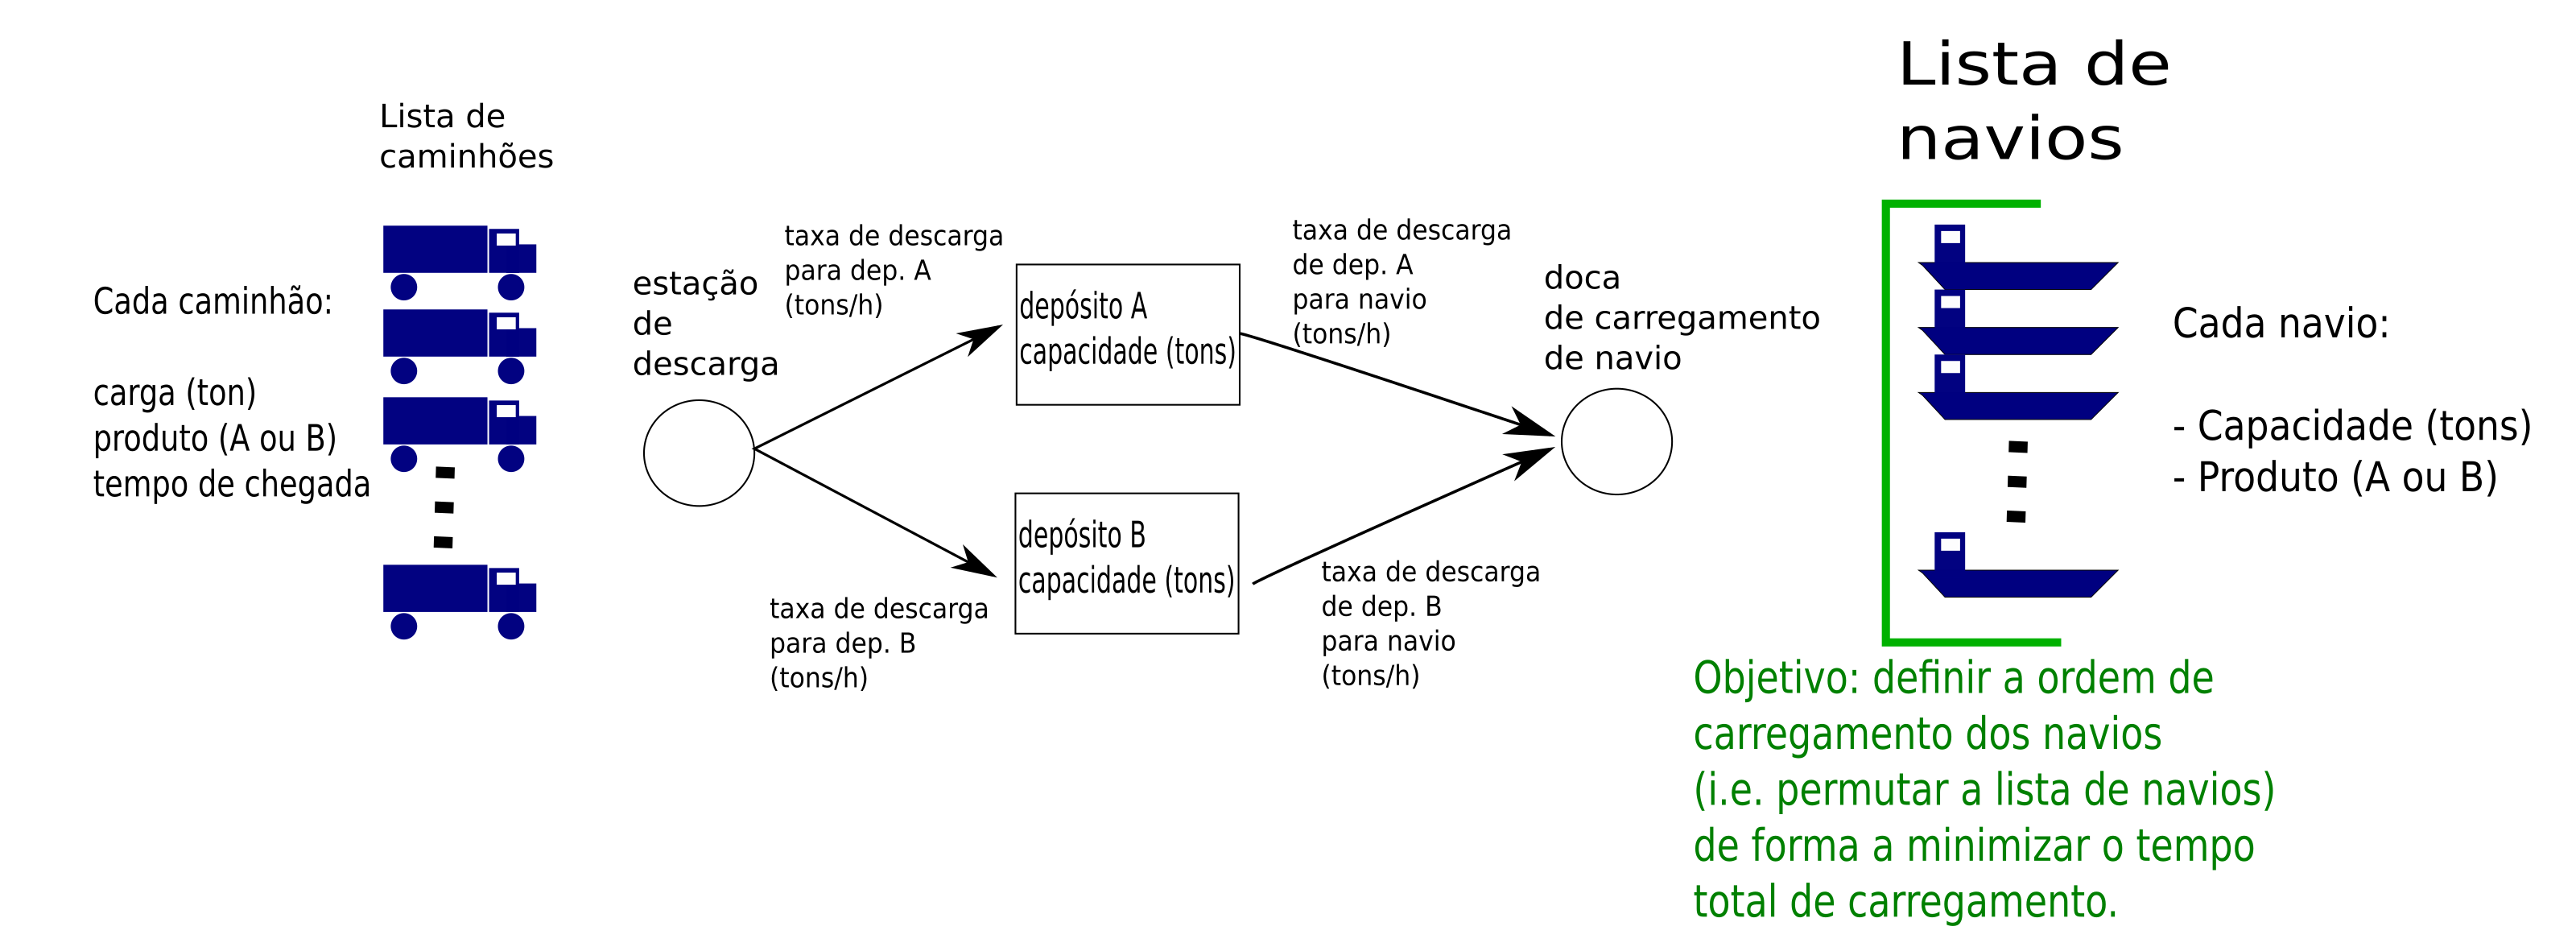

***Dados:***
- Dois tipos de produto (A e B)
- Dois depósitos, um para cada produto
  - Cada um com sua capacidade (tons)
- Lista de navios, cada um contendo:
  - ID
  - Capacidade (ton)
  - Produto (A ou B)
- Lista de caminhões:
  - ID
  - Produto (A ou B)
  - Quantidade (ton)
  - ETA: Tempo de chegada (horas desde início do cenário)
- Tempos de vazão dos meios de distribuição (ton/h):
  - Caminhão para depósito A
  - Caminhão para depósito B
  - Depósito A para navio
  - Depósito B para navio
- Lista de manutenções:
  - A lista de manutenções deve ser dijunta (não haverão manutenções simultâneas)
  - Pertinente aos meios de distribuição:
    - Caminhão para depósitos
    - Depósitos para navio
  - Tempo de início e fim (horas desde início do cenário)

***Objetivo:***
- Ordenar a lista de navios de forma a minimizar o tempo total de carregamento dos navios.

***Restrições:***
- Apenas um navio pode estar sendo abastecido ao mesmo tempo, e uma vez
  que ele partiu, não volta mais.
  - O primeiro navio na fila entra na doca de descarga na hora 0
  - Quando um navio sai, o próximo navio na fila ocupa seu lugar
    imediatamente.
  - Navios não podem voltar para a fila, e só saem quando estão cheios.
- Apenas um caminhão pode estar sendo descarregado ao mesmo tempo, e os
  outros caminhões precisam ir para uma *fila de caminhões*:
  - Se o caminhão que está no ponto de descarga é tal que o meio de distribuição
    dele para o seu armazém está em manutenção, ou o armazém está cheio,
    ele deve ser mandado para a *fila de caminhões*.
  - Se já existe um caminhão A no ponto de descarga quando um outro
    caminhão B chega, o caminhão B deve ir para a *fila de caminhões*.
  - Se o caminhão está vazio, ele deve partir, deixando vago o ponto de
    descarga.
  - Se não há caminhões no ponto de descarga, deve-se tentar puxar um
    caminhão da fila (FIFO) da seguinte maneira:
    
    Repetir este loop até passar por todos os caminhões da fila:
    - Remove um caminhão C do começo da fila.
    - Se o descarregamento do caminhão C até o armazém está disponível (não está em manutenção), e o
        armazém não está cheio, manda o caminhão C para o ponto de
        descarga e quebra o loop.
    - Caso contrário, move o caminhão C para o fim da fila, marca
        a estação de descarga como vazia, e reinicia o loop.

    (Este loop já está implementado na classe Simulator)
        
- Tempos de troca de navio, troca de caminhão, e troca de linhas de
  distribuição são considerados negligíveis.
  - Isso significa que, na hora em que um caminhão sai, ele pode ser
    imediatamente substituído pelo próximo, e o mesmo vale para navios.
- Não é possível fazer um carregamento/descarregamento quando os meios
  de distribuição estão indisponíveis.
- Horas para carga/descarga são consideradas unidades de tempo
  indivisíveis, o que implica:
  - O tempo, em horas, que um caminhão leva para descarregar é igual a
    teto(carga_caminhão/taxa_de_descarga).
  - O tempo, em horas, que um navio leva para carregar é igual a
    teto(capacidade_navio/taxa_de_carga).


# Exemplo de entrada (desafio do bootcamp)

O exemplo de entrada a seguir é o ***bootcamp***. Uma solução ótima não é necessária, mas procure obter a melhor solução que puder.

In [ ]:
input_data = {
    "throughput": {
        "ware_a_to_ship": 30,
        "ware_b_to_ship": 30,
        "truck_to_ware_a": 30,
        "truck_to_ware_b": 50
    },
    "warehouse_a": {
        "capacity": 260,
        "start_load": 0
    },
    "warehouse_b": {
        "capacity": 260,
        "start_load": 0
    },
    "maintenances": [
        {
            "start": 4,
            "end": 9,
            "origin": "B",
            "destination": "ship"
        },
        {
            "start": 16,
            "end": 25,
            "origin": "truck",
            "destination": "A"
        }
    ],
    "trucks": [
        {
            "id": "truck0",
            "load": 400,
            "product": "A",
            "eta": 6
        },
        {
            "id": "truck1",
            "load": 500,
            "product": "A",
            "eta": 21
        },
        {
            "id": "truck2",
            "load": 500,
            "product": "A",
            "eta": 48
        },
        {
            "id": "truck3",
            "load": 530,
            "product": "A",
            "eta": 59
        },
        {
            "id": "truck4",
            "load": 100,
            "product": "B",
            "eta": 0
        },
        {
            "id": "truck5",
            "load": 40,
            "product": "B",
            "eta": 32
        },
        {
            "id": "truck6",
            "load": 230,
            "product": "B",
            "eta": 38
        },
        {
            "id": "truck7",
            "load": 800,
            "product": "B",
            "eta": 68
        }
    ],
    "ships": [
        {
            "id": "ship0",
            "product": "A",
            "capacity": 300,
            "start_load": 0
        },
        {
            "id": "ship1",
            "product": "A",
            "capacity": 200,
            "start_load": 0
        },
        {
            "id": "ship2",
            "product": "A",
            "capacity": 350,
            "start_load": 0
        },
        {
            "id": "ship3",
            "product": "A",
            "capacity": 400,
            "start_load": 0
        },
        {
            "id": "ship4",
            "product": "B",
            "capacity": 140,
            "start_load": 0
        },
        {
            "id": "ship5",
            "product": "B",
            "capacity": 40,
            "start_load": 0
        },
        {
            "id": "ship6",
            "product": "B",
            "capacity": 280,
            "start_load": 0
        },
        {
            "id": "ship7",
            "product": "B",
            "capacity": 210,
            "start_load": 0
        }
    ]
}


In [ ]:
# Armazem já começa com alguma carga
input_data = {
    "throughput": {
        "ware_a_to_ship": 30,
        "ware_b_to_ship": 30,
        "truck_to_ware_a": 30,
        "truck_to_ware_b": 50
    },
    "warehouse_a": {
        "capacity": 500,
        "start_load": 100
    },
    "warehouse_b": {
        "capacity": 260,
        "start_load": 50
    },
    "maintenances": [
        {
            "start": 4,
            "end": 9,
            "origin": "B",
            "destination": "ship"
        },
        {
            "start": 16,
            "end": 25,
            "origin": "truck",
            "destination": "A"
        }
    ],
    "trucks": [
        {
            "id": "truck0",
            "load": 400,
            "product": "A",
            "eta": 6
        },
        {
            "id": "truck1",
            "load": 500,
            "product": "A",
            "eta": 21
        },
        {
            "id": "truck2",
            "load": 500,
            "product": "A",
            "eta": 48
        },
        {
            "id": "truck3",
            "load": 530,
            "product": "A",
            "eta": 59
        },
        {
            "id": "truck4",
            "load": 100,
            "product": "B",
            "eta": 0
        },
        {
            "id": "truck5",
            "load": 40,
            "product": "B",
            "eta": 32
        },
        {
            "id": "truck6",
            "load": 230,
            "product": "B",
            "eta": 38
        },
        {
            "id": "truck7",
            "load": 800,
            "product": "B",
            "eta": 68
        }
    ],
    "ships": [
        {
            "id": "ship0",
            "product": "A",
            "capacity": 300,
            "start_load": 0
        },
        {
            "id": "ship1",
            "product": "A",
            "capacity": 200,
            "start_load": 0
        },
        {
            "id": "ship2",
            "product": "A",
            "capacity": 350,
            "start_load": 0
        },
        {
            "id": "ship3",
            "product": "A",
            "capacity": 400,
            "start_load": 0
        },
        {
            "id": "ship4",
            "product": "B",
            "capacity": 140,
            "start_load": 0
        },
        {
            "id": "ship5",
            "product": "B",
            "capacity": 40,
            "start_load": 0
        },
        {
            "id": "ship6",
            "product": "B",
            "capacity": 280,
            "start_load": 0
        },
        {
            "id": "ship7",
            "product": "B",
            "capacity": 210,
            "start_load": 0
        }
    ]
}

In [ ]:
# Navios já começam com alguma carga
input_data = {
    "throughput": {
        "ware_a_to_ship": 30,
        "ware_b_to_ship": 30,
        "truck_to_ware_a": 30,
        "truck_to_ware_b": 50
    },
    "warehouse_a": {
        "capacity": 500,
        "start_load": 100
    },
    "warehouse_b": {
        "capacity": 260,
        "start_load": 50
    },
    "maintenances": [
        {
            "start": 4,
            "end": 9,
            "origin": "B",
            "destination": "ship"
        },
        {
            "start": 16,
            "end": 25,
            "origin": "truck",
            "destination": "A"
        }
    ],
    "trucks": [
        {
            "id": "truck0",
            "load": 400,
            "product": "A",
            "eta": 6
        },
        {
            "id": "truck1",
            "load": 500,
            "product": "A",
            "eta": 21
        },
        {
            "id": "truck2",
            "load": 500,
            "product": "A",
            "eta": 48
        },
        {
            "id": "truck3",
            "load": 530,
            "product": "A",
            "eta": 59
        },
        {
            "id": "truck4",
            "load": 100,
            "product": "B",
            "eta": 0
        },
        {
            "id": "truck5",
            "load": 40,
            "product": "B",
            "eta": 32
        },
        {
            "id": "truck6",
            "load": 230,
            "product": "B",
            "eta": 38
        },
        {
            "id": "truck7",
            "load": 800,
            "product": "B",
            "eta": 68
        }
    ],
    "ships": [
        {
            "id": "ship0",
            "product": "A",
            "capacity": 300,
            "start_load": 0
        },
        {
            "id": "ship1",
            "product": "A",
            "capacity": 200,
            "start_load": 50
        },
        {
            "id": "ship2",
            "product": "A",
            "capacity": 350,
            "start_load": 0
        },
        {
            "id": "ship3",
            "product": "A",
            "capacity": 400,
            "start_load": 200
        },
        {
            "id": "ship4",
            "product": "B",
            "capacity": 140,
            "start_load": 0
        },
        {
            "id": "ship5",
            "product": "B",
            "capacity": 40,
            "start_load": 10
        },
        {
            "id": "ship6",
            "product": "B",
            "capacity": 280,
            "start_load": 0
        },
        {
            "id": "ship7",
            "product": "B",
            "capacity": 210,
            "start_load": 0
        }
    ]
}

In [ ]:
# Caminhao com carga muito grande
input_data = {
    "throughput": {
        "ware_a_to_ship": 30,
        "ware_b_to_ship": 30,
        "truck_to_ware_a": 30,
        "truck_to_ware_b": 50
    },
    "warehouse_a": {
        "capacity": 260,
        "start_load": 0
    },
    "warehouse_b": {
        "capacity": 260,
        "start_load": 0
    },
    "maintenances": [
        {
            "start": 4,
            "end": 9,
            "origin": "B",
            "destination": "ship"
        },
        {
            "start": 16,
            "end": 25,
            "origin": "truck",
            "destination": "A"
        }
    ],
    "trucks": [
        {
            "id": "truck0",
            "load": 400,
            "product": "A",
            "eta": 6
        },
        {
            "id": "truck1",
            "load": 500,
            "product": "A",
            "eta": 21
        },
        {
            "id": "truck2",
            "load": 500,
            "product": "A",
            "eta": 48
        },
        {
            "id": "truck3",
            "load": 530,
            "product": "A",
            "eta": 59
        },
        {
            "id": "truck4",
            "load": 100,
            "product": "B",
            "eta": 0
        },
        {
            "id": "truck5",
            "load": 40,
            "product": "B",
            "eta": 32
        },
        {
            "id": "truck6",
            "load": 230,
            "product": "B",
            "eta": 38
        },
        {
            "id": "truck7",
            "load": 800,
            "product": "B",
            "eta": 68
        },
        {
            "id": "truck8",
            "load": 100000,
            "product": "A",
            "eta": 22
        }
    ],
    "ships": [
        {
            "id": "ship0",
            "product": "A",
            "capacity": 300,
            "start_load": 0
        },
        {
            "id": "ship1",
            "product": "A",
            "capacity": 200,
            "start_load": 0
        },
        {
            "id": "ship2",
            "product": "A",
            "capacity": 350,
            "start_load": 0
        },
        {
            "id": "ship3",
            "product": "A",
            "capacity": 400,
            "start_load": 0
        },
        {
            "id": "ship4",
            "product": "B",
            "capacity": 140,
            "start_load": 0
        },
        {
            "id": "ship5",
            "product": "B",
            "capacity": 40,
            "start_load": 0
        },
        {
            "id": "ship6",
            "product": "B",
            "capacity": 280,
            "start_load": 0
        },
        {
            "id": "ship7",
            "product": "B",
            "capacity": 210,
            "start_load": 0
        }
    ]
}


In [ ]:
# Mais caminhões
input_data = {
    "throughput": {
        "ware_a_to_ship": 30,
        "ware_b_to_ship": 30,
        "truck_to_ware_a": 30,
        "truck_to_ware_b": 50
    },
    "warehouse_a": {
        "capacity": 500,
        "start_load": 100
    },
    "warehouse_b": {
        "capacity": 260,
        "start_load": 50
    },
    "maintenances": [
        {
            "start": 4,
            "end": 9,
            "origin": "B",
            "destination": "ship"
        },
        {
            "start": 16,
            "end": 25,
            "origin": "truck",
            "destination": "A"
        }
    ],
    "trucks": [
        {
            "id": "truck0",
            "load": 400,
            "product": "A",
            "eta": 6
        },
        {
            "id": "truck1",
            "load": 500,
            "product": "A",
            "eta": 21
        },
        {
            "id": "truck2",
            "load": 500,
            "product": "A",
            "eta": 48
        },
        {
            "id": "truck3",
            "load": 530,
            "product": "A",
            "eta": 59
        },
        {
            "id": "truck4",
            "load": 100,
            "product": "B",
            "eta": 0
        },
        {
            "id": "truck5",
            "load": 40,
            "product": "B",
            "eta": 32
        },
        {
            "id": "truck6",
            "load": 230,
            "product": "B",
            "eta": 38
        },
        {
            "id": "truck7",
            "load": 800,
            "product": "B",
            "eta": 68
        },
        {
            "id": "truck8",
            "load": 150,
            "product": "A",
            "eta": 2
        },
        {
            "id": "truck9",
            "load": 60,
            "product": "A",
            "eta": 15
        }
    ],
    "ships": [
        {
            "id": "ship0",
            "product": "A",
            "capacity": 300,
            "start_load": 0
        },
        {
            "id": "ship1",
            "product": "A",
            "capacity": 200,
            "start_load": 0
        },
        {
            "id": "ship2",
            "product": "A",
            "capacity": 350,
            "start_load": 0
        },
        {
            "id": "ship3",
            "product": "A",
            "capacity": 400,
            "start_load": 0
        },
        {
            "id": "ship4",
            "product": "B",
            "capacity": 140,
            "start_load": 0
        },
        {
            "id": "ship5",
            "product": "B",
            "capacity": 40,
            "start_load": 0
        },
        {
            "id": "ship6",
            "product": "B",
            "capacity": 280,
            "start_load": 0
        },
        {
            "id": "ship7",
            "product": "B",
            "capacity": 210,
            "start_load": 0
        }
    ]
}

In [ ]:
# Com mais navios
input_data = {
    "throughput": {
        "ware_a_to_ship": 30,
        "ware_b_to_ship": 30,
        "truck_to_ware_a": 30,
        "truck_to_ware_b": 50
    },
    "warehouse_a": {
        "capacity": 260,
        "start_load": 0
    },
    "warehouse_b": {
        "capacity": 260,
        "start_load": 0
    },
    "maintenances": [
        {
            "start": 4,
            "end": 9,
            "origin": "B",
            "destination": "ship"
        },
        {
            "start": 16,
            "end": 25,
            "origin": "truck",
            "destination": "A"
        }
    ],
    "trucks": [
        {
            "id": "truck0",
            "load": 400,
            "product": "A",
            "eta": 6
        },
        {
            "id": "truck1",
            "load": 500,
            "product": "A",
            "eta": 21
        },
        {
            "id": "truck2",
            "load": 500,
            "product": "A",
            "eta": 48
        },
        {
            "id": "truck3",
            "load": 530,
            "product": "A",
            "eta": 59
        },
        {
            "id": "truck4",
            "load": 100,
            "product": "B",
            "eta": 0
        },
        {
            "id": "truck5",
            "load": 40,
            "product": "B",
            "eta": 32
        },
        {
            "id": "truck6",
            "load": 230,
            "product": "B",
            "eta": 38
        },
        {
            "id": "truck7",
            "load": 800,
            "product": "B",
            "eta": 68
        },
        {
            "id": "truck8",
            "load": 10000,
            "product": "B",
            "eta": 40
        },
        {
            "id": "truck9",
            "load": 10000,
            "product": "A",
            "eta": 21
        }
    ],
    "ships": [
        {
            "id": "ship0",
            "product": "A",
            "capacity": 300,
            "start_load": 0
        },
        {
            "id": "ship1",
            "product": "A",
            "capacity": 200,
            "start_load": 0
        },
        {
            "id": "ship2",
            "product": "A",
            "capacity": 350,
            "start_load": 0
        },
        {
            "id": "ship3",
            "product": "A",
            "capacity": 400,
            "start_load": 0
        },
        {
            "id": "ship4",
            "product": "B",
            "capacity": 140,
            "start_load": 0
        },
        {
            "id": "ship5",
            "product": "B",
            "capacity": 40,
            "start_load": 0
        },
        {
            "id": "ship6",
            "product": "B",
            "capacity": 280,
            "start_load": 0
        },
        {
            "id": "ship7",
            "product": "B",
            "capacity": 210,
            "start_load": 0
        },
        {
            "id": "ship8",
            "product": "A",
            "capacity": 500,
            "start_load": 0
        },
        {
            "id": "ship9",
            "product": "B",
            "capacity": 300,
            "start_load": 0
        }
    ]
}


# Implementação das classes básicas

In [ ]:
import sys
import json
import random
import math
import heapq
from collections import deque, defaultdict
from copy import copy
from math import ceil
import matplotlib.pyplot as plt
from typing import List, Tuple
from time import perf_counter, strftime, gmtime
import requests
import pdb

In [ ]:
class Truck:
    """
    Represents trucks

    Attributes:
      id: the truck id
      eta: the time of arrival (hours since start)
      product: the product it carries (either 'A' or 'B')
      start_load: the load (in tons) the truck is carrying at the start
      curr_liad: the current load of the truck during a simulation

    Methods:
      reset: changes the truck's current load to match the starting load
             to restart a simulation
    """
    def __init__(self, id: str, eta: int, product: str, load: int):
        self.id = id
        self.eta = eta
        self.curr_load = load
        self.start_load = load
        self.product = product

    def reset(self):
        self.curr_load = self.start_load


class Maintenance:
    """
    Maintenance periods for throughput

    Attributes:
       origin: the starting point of the pipeline in maintenance
               (can be either 'truck', or 'A'/'B')
       destination: the end point of the pipeline in maintenance
                    (can be either 'A'/'B' or 'ship')
       start: the start time (hours since start of scenario)
              of the maintenance
       end: the end time (hours since start of scenario) of maintenance
    """
    def __init__(self, origin: str, destination:str, start: int, end: int):
        self.start = start
        self.end = end
        self.origin = origin
        self.destination = destination


class Warehouse:
    """
    warehouses

    Attributes:
        product: the product the warehouse contains (either 'A' or 'B')
        capacity: the total capacity of the warehouse (tons)
        start_load: the initial load of the warehouse (tons)
        curr_load: current load (tons) during a simulation
    Methods:
        reset: sets curr_load to the value of start_load to restart simulation
        is_full: verifies whether the warehouse still has room for one more ton
    """
    def __init__(self, product: str, capacity: int, start_load: int):
        self.product = product
        self.capacity = capacity
        self.curr_load = start_load
        self.start_load = start_load

    def reset(self):
        self.curr_load = self.start_load

    def is_full(self):
        return self.curr_load >= self.capacity - 0.001


class Throughput:
    """
    throughput between all four main "edges" of the port

    Attributes:
       ware_a_to_ship: throughput (tons/h) from warehouse 'A' to ships
       ware_b_to_ship: throughput (tons/h) from warehouse 'B' to ships
       truck_to_ware_a: throughput (tons/h) from truck to warehouse 'A'
       truck_to_ware_b: throughput (tons/h) from truck to warehouse 'B'
    """
    def __init__(self, truck_to_ware_a: int, truck_to_ware_b: int,
                 ware_a_to_ship: int,
                 ware_b_to_ship: int):
        self.ware_a_to_ship = ware_a_to_ship
        self.ware_b_to_ship = ware_b_to_ship
        self.truck_to_ware_a = truck_to_ware_a
        self.truck_to_ware_b = truck_to_ware_b


class Ship:
    """
    cargo ships

    Attributes:
        id: the ship's id
        product: the product the ship must be filled with ('A' or 'B')
        capacity: the total capacity (tons) of the ship
        start_load: the ship's load at the start of the scenario
        curr_load: the ship's load at the current point of the simulation

    Methods:
        reset: sets curr_load to start_load to restart the simulation
    """
    def __init__(self, id: str, product: str, capacity: int, start_load: int):
        self.id = id
        self.product = product
        self.capacity = capacity
        self.start_load = start_load
        self.curr_load = start_load

    def reset(self):
        self.curr_load = self.start_load

    def __lt__(self, other):
        return self.id < other.id

    def __gt__(self, other):
        return self.id > other.id

    def __eq__(self, other):
        return self.id == other.id

    def __le__(self, other):
        return self.id <= other.id

    def __ge__(self, other):
        return self.id >= other.id

    def __ne__(self, other):
        return self.id != other.id

O objeto de problema que contém todos os dados:

In [ ]:
class Problem:
    """
    contains all the information about the current problem

    Attributes:
        trucks: list of trucks
        warehouse: dict containing warehouses 'A' and 'B'
        ships: list of ships
        throughput: the throughputs of the port
        maintenances: list of maintenances

    Methods:
        reset_all: resets all objects contained in the problem
                   to restart the simulation
    """
    def __init__(self, trucks: List[Truck], warehouse_a: Warehouse,
                 warehouse_b: Warehouse,
                 ships: List[Ship],
                 throughput: Throughput,
                 maintenances: List[Maintenance]):
        self.trucks = trucks
        self.warehouse = {
        'A': warehouse_a,
        'B': warehouse_b
        }
        self.ships = ships
        self.throughput = throughput
        self.maintenances = maintenances

    def reset_all(self):
        # resets everything to restart the simulation
        for truck in self.trucks:
            truck.reset()
        for ship in self.ships:
            ship.reset()
        self.warehouse['A'].reset()
        self.warehouse['B'].reset()

O construtor do problema, que recebe o JSON de entrada (já convertido em dicionário) e constrói o problema:

In [ ]:
class ProblemBuilder:
    """
    recieves the JSON data and turns it into a problem object

    Attributes:
        input_data: the input data of the problem as a dictionary
    Methods:
        build: turns the information in input_data into a Problem object
    """
    def __init__(self, input_data: dict):
        self.input_data = input_data

    def build(self):
        """
        turns the information of self.input_data into a Problem object
        Returns:
            a Problem object built with the information from self.input_data
        """
        trucks = []
        for truck in self.input_data["trucks"]:
            trucks.append(
                Truck(truck["id"],
                      truck["eta"],
                      truck["product"],
                      truck["load"])
            )
        ships = []
        for ship in self.input_data["ships"]:
            ships.append(
                Ship(ship["id"],
                     ship["product"],
                     ship["capacity"],
                     ship["start_load"])
            )
        warehouse_a = Warehouse(
                        'A',
                        self.input_data["warehouse_a"]["capacity"],
                        self.input_data["warehouse_a"]["start_load"]
                        )
        warehouse_b = Warehouse(
                        'B',
                        self.input_data["warehouse_b"]["capacity"],
                        self.input_data["warehouse_b"]["start_load"]
                        )
        throughput = Throughput(
                     self.input_data["throughput"]["truck_to_ware_a"],
                     self.input_data["throughput"]["truck_to_ware_b"],
                     self.input_data["throughput"]["ware_a_to_ship"],
                     self.input_data["throughput"]["ware_b_to_ship"]
                        )
        maintenances = []
        for maintenance in self.input_data["maintenances"]:
            maintenances.append(
                Maintenance(
                    maintenance["origin"],
                    maintenance["destination"],
                    maintenance["start"],
                    maintenance["end"])
                )
        problem=Problem(
            trucks=trucks,
            warehouse_a=warehouse_a,
            warehouse_b=warehouse_b,
            ships=ships,
            throughput=throughput,
            maintenances=maintenances
        )
        return problem

# Simulador de cenário

In [ ]:
def seconds_to_formatted_time(seconds: float) -> str:
    """
    Function to format seconds (float) in readable string.
    """
    return "".join(
        [
            f"{value}{unit}" for value, unit in zip(
                strftime('%Ha:%M:%S', gmtime(seconds)
                ).split(":"), ["h", "m", "s"]) if value != "00"
        ]
    ) if seconds > 1 else f"{round(seconds, 4)}s"

class SimulatorApi:
    URL_API: str = "https://n5q1lw5qrj.execute-api.us-east-1.amazonaws.com/simulador_bootcamp_otm_2024"
    HEADER_POST = {
        "Content-Type": "application/json",
    }

    def __init__(self, data: dict):
      """ Constructor of simulator class

      Attributes:
       data [dict]: data to construct the problem and simulate
      """
      self.data = data


    def simulate(self, solution: list[str]) -> dict:
      """ Method to simulate one solution

      Attributes:
       solution [list[str]]: solution to be simulated
      """
      body = {
          "content": self.data,
          "solution": solution
      }

      response = requests.get(
          url=self.URL_API, json=body, headers=self.HEADER_POST
      )

      return response.json()

Os dados horários retornados pela simulação podem ser plotados com a classe *Plotter*, mostrada a seguir.

In [ ]:
class Plotter:
    """
    plots the data output by a simulation

    Attributes:
      input_data: the simulation data (in dict form)
      problem: the Problem object the simulation ran on
    Methods:
      plot_warehouse: plots warehouse data
      plot_truck_queue: plots the truck queue length, as well as the amount
                        waiting in line
      plot_ship_queue: plots the ship queue length

    """
    def __init__(self, problem: Problem, input_data: dict, figsize=(12,10)):
        self.problem = problem
        self.input_data = input_data
        self.figsize = figsize

    def plot_warehouse(self):
        # warehouse A first
        plt.figure(figsize=self.figsize)
        max_load = [self.problem.warehouse['A'].capacity for _ in
                    range(len(self.input_data["ware_a"]))]
        plt.plot(self.input_data["ware_a"], label="Warehouse A load")
        plt.plot(max_load, label="Max load")
        plt.xlabel("Hour")
        plt.ylabel("Tons")
        plt.legend()
        plt.show()

        # warehouse B next
        plt.figure(figsize=self.figsize)
        max_load = [self.problem.warehouse['B'].capacity for _ in
                    range(len(self.input_data["ware_b"]))]
        plt.plot(self.input_data["ware_b"], label="Warehouse B load")
        plt.plot(max_load, label="Max load")
        plt.xlabel("Hour")
        plt.ylabel("Tons")
        plt.legend()
        plt.show()

    def plot_truck_queue(self):
        # first the queue size
        plt.figure(figsize=self.figsize)
        plt.plot(self.input_data["truck_line_size"],
                 label="Trucks waiting in line")
        plt.xlabel("Hour")
        plt.ylabel("Truck count")
        plt.legend()
        plt.show()

        # then the amount waiting in line
        plt.figure(figsize=self.figsize)
        plt.plot(self.input_data["product_a_stuck_in_line"],
                 label="Total weight of A stuck in line")
        plt.plot(self.input_data["product_b_stuck_in_line"],
                 label="Total weight of B stuck in line")
        plt.xlabel("Hour")
        plt.ylabel("Tons")
        plt.legend()
        plt.show()

    def plot_ship_queue(self):
        # simplest one, just plot the evolution of the ship queue
        plt.figure(figsize=self.figsize)
        plt.plot(self.input_data["ship_queue_size"],
                 label="Length of ship queue")
        plt.xlabel("Hour")
        plt.ylabel("Ship count")
        plt.legend()
        plt.show()

    def plot(self):
        """
        main plotting function
        """
        self.plot_warehouse()
        self.plot_truck_queue()
        self.plot_ship_queue()

# Solver do problema (branch and bound)

In [ ]:
class BoundingFunction:
    """
    class that calculates the bounding function (used both in the greedy
    lower bound and the branch-and-bound method)

    Attributes:
      - problem: the problem on which the estimate is to be calculated
    Methods:
      - bound: the main bounding function, called from the Solver
      - estimate_elapsed_time: provides a rough estimate of the loading time
    """
    def __init__(self, problem):
        self.problem = problem
        self.fila_espera = deque()
        self.next_truck_to_arrive = 0
        self.actual_time = 0
        self.estacao_descarga = None

        self.maintenances = sorted(self.problem.maintenances, key=lambda m: m.start)

    def bound(self, partial_solution: List[Ship]):
        """
        main bounding function
        Args:
          partial_solution: a partial solution (permutation of a subset of the
                            ship list)
        Returns:
          a bounding value (a heuristic estimate of the lower bound of the best
          possible complete solution built from partial_solution)
        """
        aux = self.estimate_elapsed_time(partial_solution)
        return aux

    def estimate_elapsed_time(self, ship_sequence: List[Ship]) -> int:
        total_time = 0
        for ship in ship_sequence:
            load_needed = ship.capacity - ship.start_load
            throughput_rate = self.problem.throughput.ware_a_to_ship if ship.product == 'A' else self.problem.throughput.ware_b_to_ship
            time_to_load = ceil(load_needed / throughput_rate)

            for maintenance in self.maintenances:
                if maintenance.destination == 'ship' and maintenance.origin == ship.product:
                    if total_time < maintenance.end and total_time + time_to_load > maintenance.start:
                        time_to_load += maintenance.end - maintenance.start

            total_time += time_to_load

        return total_time


class Solver:
    """
    class that contains the solver itself

    Attributes:
        problem: the problem to solve
        estimator: a TimeEstimator instance used to estimate simulation times
    Methods:
        simulated_annealing: obtains an initial solution via simulated annealing
        bound: the bounding function for branch-and-bound (calls external
               BoundingFunction method)
        get_solution: retrieves a solution from the solution list
        branch_and_bound: executes the branch and bound algorithm to find the
                          best solution
    """
    def __init__(self, input_data: dict):
        self.input_data = input_data
        builder = ProblemBuilder(self.input_data)
        self.problem = builder.build()
        self.problem.maintenances.sort(key = lambda m: m.start)
        self.bounder = BoundingFunction(self.problem)
        self.simulation_count = 0
        self.simulator = SimulatorApi(data=input_data)

        self.temperature = 10000
        self.cooling_rate = 0.99

        self.solution_heap = []

    def add_solution(self, solution: List[Ship]):
        """
        Adds a solution to a heap, using the lower bound value as the key.

        Attributes:
        - solution (List[Ship]): A list representing the solution to be added to the heap.
        """
        bound_value = self.bound(solution)
        heapq.heappush(self.solution_heap, (bound_value, solution))

    def get_neighbor_solution(self, current_solution):
        """
        Generates a neighbor solution by swapping two randomly selected elements in the current solution.

        Attributes:
        - current_solution (list): A list of ships representing the current solution.

        Returns:
        - list: A new list which is a neighbor of the current solution. This neighbor is formed by swapping
          two elements in the current solution.
        """
        idx1, idx2 = random.sample(range(len(current_solution)), 2)
        neighbor = current_solution[:]
        neighbor[idx1], neighbor[idx2] = neighbor[idx2], neighbor[idx1]
        return neighbor


    def simulated_annealing(self):
        """
        Provides a simulated_annealing first solution.
        Returns:
          a solution (permutation of self.problem.ships) built via simulated annealing.
        """
        current_solution = self.problem.ships[:]
        current_cost = self.bound(current_solution)
        best_solution = current_solution[:]
        best_cost = current_cost

        while self.temperature > 1:
            neighbor = self.get_neighbor_solution(current_solution)
            neighbor_cost = self.bound(neighbor)

            if neighbor_cost < current_cost:
                current_solution = neighbor
                current_cost = neighbor_cost
                if neighbor_cost < best_cost:
                    best_solution = neighbor
                    best_cost = neighbor_cost
            else:
                if random.uniform(0, 1) < math.exp((current_cost - neighbor_cost) / self.temperature):
                    current_solution = neighbor
                    current_cost = neighbor_cost

            self.temperature *= self.cooling_rate

        return best_solution

    def bound(self,partial_solution: List[Ship]):
        return self.bounder.bound(partial_solution)

    def get_solution(self):
        """
        Retorna a solução mais promissora da heap.
        """
        if self.solution_heap:
            return heapq.heappop(self.solution_heap)[1]
        return None

    def branch_and_bound(self):
        """
        the main branch-and-bound algorithm
        Returns:
          the best solution found by the branch and bound method
        """
        best_so_far = self.simulated_annealing()
        output = self.simulator.simulate(
            solution=[s.id for s in best_so_far]
        )
        self.simulation_count += 1
        best_time = output["time"]


        self.add_solution([])


        while self.solution_heap and self.simulation_count < 119:
            partial_solution = self.get_solution()
            if partial_solution is None:
                break

            if self.bound(partial_solution) >= best_time:
                continue

            if len(partial_solution) == len(self.problem.ships):
                output = self.simulator.simulate(
                    solution=[s.id for s in partial_solution]
                )
                new_time = output["time"]
                self.simulation_count += 1
                if new_time < best_time:
                    best_time = new_time
                    best_so_far = partial_solution
                continue
            other_ships = [s for s in self.problem.ships
                           if s not in partial_solution]

            for ship in other_ships:
                new_sol = copy(partial_solution)
                new_sol.append(ship)
                if self.bound(new_sol) < best_time:
                    self.add_solution(new_sol)
        return best_so_far

# Exemplo de execução

A seguir, mostramos a execução do otimizador sobre o problema do desafio.

Primeiramente, criamos o Solver e obtemos a solução:

In [ ]:
# sends input data to solver and starts up timer
solver = Solver(input_data)
time_at_start = perf_counter()

# obtains solver's solution and shows total time taken
best_solution = solver.branch_and_bound()
time_at_end = perf_counter()
duration_simulation = seconds_to_formatted_time(
    time_at_end - time_at_start
)
print(f"Duration solver: {duration_simulation}")



Duration solver: 00ah36s


Depois, executamos uma simulação para exibir a solução e preparar os dados horários para plotagem:

# Simulação da Solução do Solver

A seguir, rodamos a simulação novamente sobre a solução obtida pelo Solver, para podermos extrair os dados da solução para plotagem.

In [ ]:
# given the solution obtained above, starts a new simulator
# to obtain the total time, as well as the data for plotting
simulator: SimulatorApi = SimulatorApi(input_data)
solution: list[str] = [s.id for s in best_solution]
#solution = ['ship5', 'ship4', 'ship1', 'ship7', 'ship0', 'ship6', 'ship2', 'ship3']
time_at_start = perf_counter()
output = simulator.simulate(solution)
time_at_end = perf_counter()
duration_simulation = seconds_to_formatted_time(
    round(time_at_end - time_at_start, 4)
)
print(f"Duration simulation: {duration_simulation} seconds")
time = output["time"] # só o int do tempo total
data = output["data"] # data: vários dados da simulação

# data["truck info"]: contains arrival and departure of every truck.
for truck in data["truck_info"]:
    print(f"Truck {truck}:")
    print(f"    Arrival: {data['truck_info'][truck]['arrival']}")
    print(f"    Departure: {data['truck_info'][truck]['departure']}")

# prints the total time as well as the final solution
print(solution, time)

Duration simulation: 0.2644s seconds
Truck truck4:
    Arrival: 0
    Departure: 2
Truck truck0:
    Arrival: 6
    Departure: 30
Truck truck1:
    Arrival: 21
    Departure: 47
Truck truck5:
    Arrival: 32
    Departure: 48
Truck truck6:
    Arrival: 38
    Departure: 53
Truck truck2:
    Arrival: 48
    Departure: 70
Truck truck3:
    Arrival: 59
    Departure: None
Truck truck7:
    Arrival: 68
    Departure: None
['ship0', 'ship1', 'ship2', 'ship4', 'ship3', 'ship5', 'ship6', 'ship7'] 85


Finalmente, criamos um objeto Plotter e plotamos os gráficos dos dados horários:

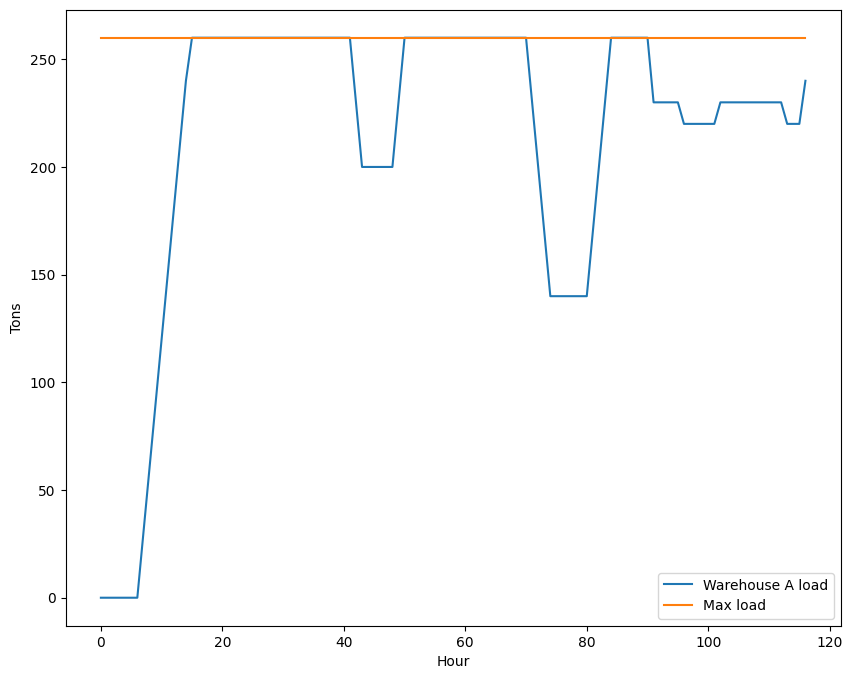

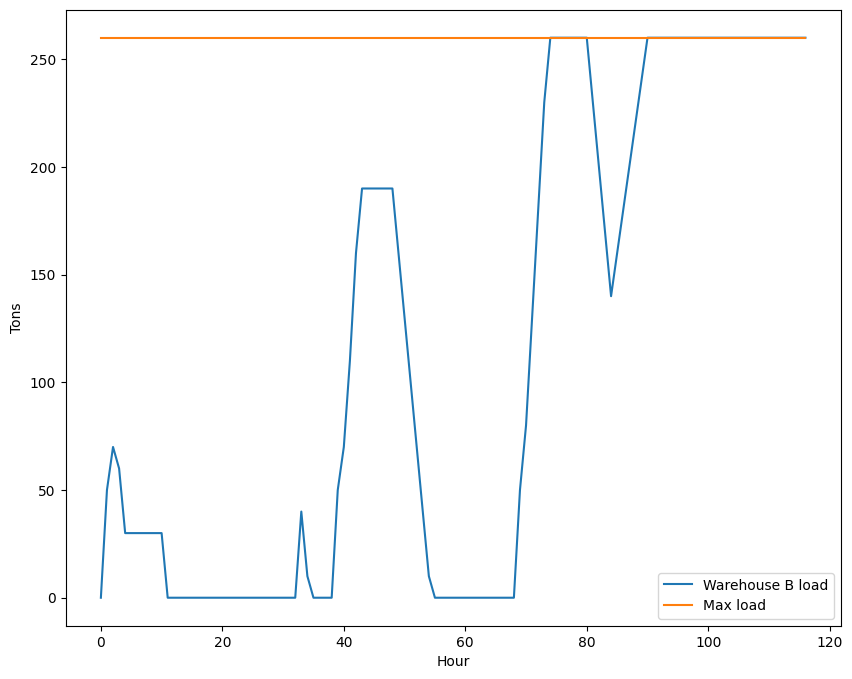

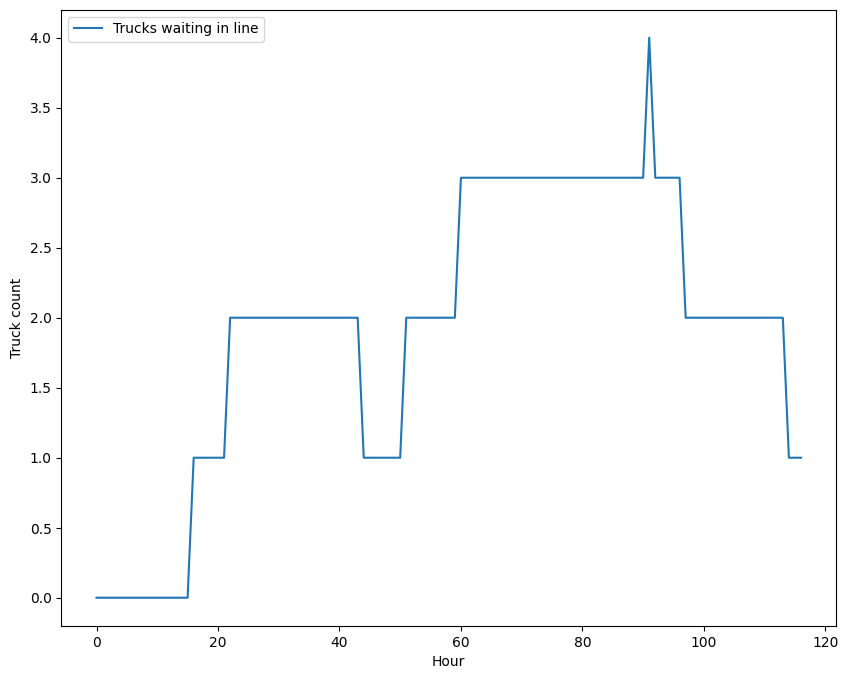

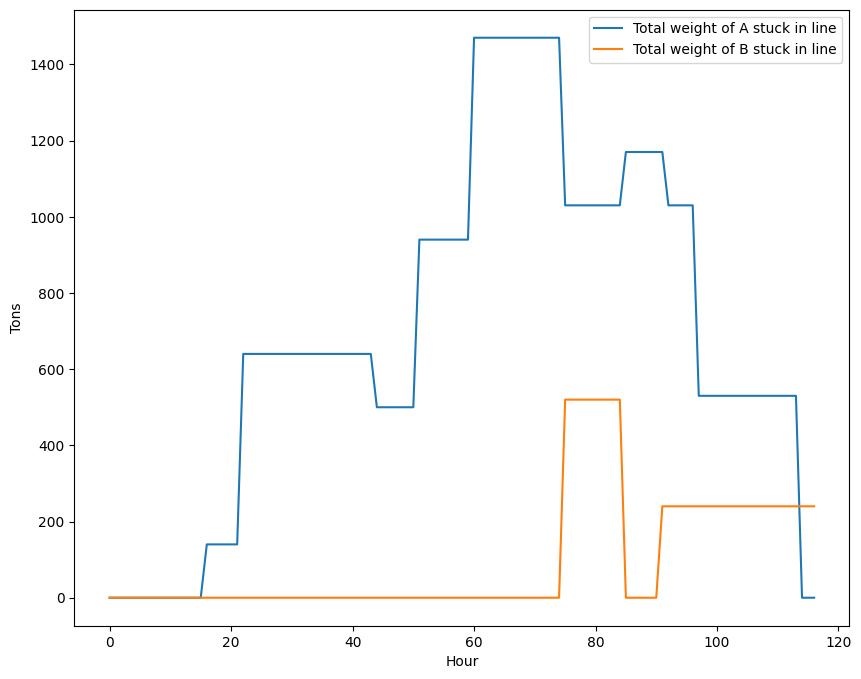

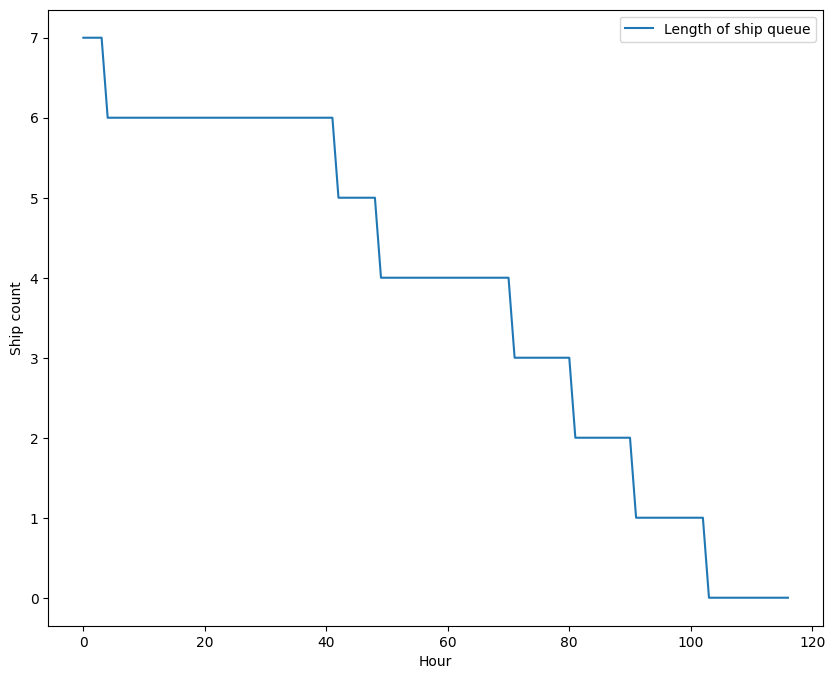

In [ ]:
# plot the solution data (hour-by-hour) and show the graphs
plotter = Plotter(solver.problem, data, figsize=(10, 8))
plotter.plot()